In [14]:
import numpy as np
import scipy as sp

from numpy import append, array, diagonal, tril, triu
from numpy.linalg import inv
from scipy.linalg import lu
#from scipy.linalg import solve
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

from sympy import *
import sympy as sym
init_printing()

import matplotlib as mpl
# matplotlib for ploting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     # 3d
# for inline interactive plotting
%matplotlib notebook

#mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png', 'pdf')
# for better picture quality
%config InlineBackend.figure_format = 'retina'
#https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

import seaborn as sns
sns.set()
#sns.set_style(style= "whitegrid")
#plt.style.available
# bold graph style
plt.style.use('fivethirtyeight')

# Linear Equations

## Iterative Methods


Algorithms based on Gaussian elimination are called **exact** or, more properly, **direct**
methods because they would generate exact solutions for the linear equation $Ax = b$
after a finite number of operations, if not for rounding error. Such methods are ideal
for moderately-sized linear equations, but may be impractical for large ones. 


Other methods, called **iterative methods** can often be used to solve large linear equations
more efficiently if the A matrix is sparse, that is, if $A$ is composed mostly of zero
entries. Iterative methods are designed to generate a sequence of increasingly accurate
approximations to the solution of a linear equation, but generally do not yield an exact
solution after a prescribed number of steps, even in theory.


The most widely-used iterative methods for solving a linear equation $Ax = b$ are
developed by choosing an **easily invertible matrix $Q$** and writing the linear equation
in the equivalent form

$$Q x = b + (Q - A)x$$

or

$$x = Q^{-1}b + (I - Q^{-1}A)x.$$

This form of the linear equation suggests the iteration rule



$$x^{(k+1)} \leftarrow   Q^{-1}b + (I - Q^{-1}A)x^{(k)}$$

Ideally, the so-called **splitting matrix Q** will satisfy two criteria. First, $Q^{-1}b$ and
$Q^{-1}A$ should be relatively easy to compute. This is true if Q is either diagonal or
triangular. Second, the iterates should **converge quickly** to the true solution of the
linear equation. If

$$||I - Q^{-1}A|| < 1$$

in any matrix norm, then the iteration rule is a contraction mapping and is **guaranteed**
to converge to the solution of the linear equation from any initial value.

The two most popular iterative methods are the **Gauss-Jacobi** and **Gauss-Seidel**
methods. 

 - The Gauss-Jacobi method sets $Q$ equal to the diagonal matrix formed from the diagonal entries of A. 


 - The Gauss-Seidel method sets $Q$ equal to the upper triangular matrix formed from the upper triagonal elements of A.


In [21]:
# example problem

A = np.array([[54, 14, -11, 2],
               [14, 50, -4, 29],
               [-11, -4, 55, 22],
               [2, 29, 22, 95]])
print("Left hand side of linear system, matrix A:\n", A)
b = np.array([1, 1, 1, 1])
x0 = [1, 1, 1,1]

n = 25


print( "A:")
pprint(A)


#rint( "diag(A):")
#print((diag(A)))


#rint("pprint(diagflat(diag(A)))")
#print(diagflat(diag(A)))

print( "b:")
pprint(b)

print( "x0:")
pprint(x0)

print( "n:")
pprint(n)


Left hand side of linear system, matrix A:
 [[ 54  14 -11   2]
 [ 14  50  -4  29]
 [-11  -4  55  22]
 [  2  29  22  95]]
A:
 [[ 54  14 -11   2]
  [ 14  50  -4  29]
  [-11  -4  55  22]
 [  2  29  22  95]]
b:
[1 1 1 1]
x0:
[1, 1, 1, 1]
n:
25


the user specifies the data A and b and an initial guess $x$ for the solution of
the linear equation, typically the zero vector or $b$. 

Iteration continues until the norm
of the change dx in the iterate falls below the specified convergence tolerance tol or
until a specified maximum number of allowable iterations maxit are performed.

In [10]:
#p17

maxit = 1000
tol = 1/10000 
x0 = np.array([1,1,1,1])
x0= b

d = np.diag(np.diag(A))
x = x0
for it in np.arange(maxit):
    dx =  inv(d).dot(b - A.dot(x))
    x = x + dx
    if np.linalg.norm(dx)<tol:
        break

print("x:\n", x)        

x:
 [ 0.01892514  0.01678369  0.02335003 -0.00042463]


###  <span style="color:red">It is your turn to turn it into a function</span>

### gauss_jacobi

In [11]:
def my_gauss_jacobi(A, b, maxit=1000,tol = 1/1000, x0=None):
    """
    Solve a linear equation by the gauss jacobi iteration outlined in the book.
    Follows the eq:
        x = inv(Q)(b - Ax)
    Where Q is the diagonal matrix of A
    """
    # If we have not provided an initial array for x make a new one
    if x0==None:
        x = np.array([1 for _ in np.arange(A.shape[1])])
    else:
        x = x0
    d = np.diag(np.diag(A))
    
    for it in np.arange(maxit):
        dx =  inv(d).dot(b - A.dot(x))
        x = x + dx
        if np.linalg.norm(dx)<tol:
            break

    print("x:\n", x)  

In [12]:
my_gauss_jacobi(A, b, maxit,tol, x0=None)

x:
 [ 0.01892514  0.01678369  0.02335003 -0.00042463]


### Check it in Numpy or Scipy

In [13]:
np.linalg.solve(A,b)

array([ 0.01893441,  0.01680508,  0.02335523, -0.00041085])

In [15]:
sp.linalg.solve(A,b)

array([ 0.01893441,  0.01680508,  0.02335523, -0.00041085])

### Gauss Seidel method

In [16]:
Q = np.tril(A)
Q

array([[ 54,   0,   0,   0],
       [ 14,  50,   0,   0],
       [-11,  -4,  55,   0],
       [  2,  29,  22,  95]])

In [17]:
Q = np.triu(A)
Q

array([[ 54,  14, -11,   2],
       [  0,  50,  -4,  29],
       [  0,   0,  55,  22],
       [  0,   0,   0,  95]])

In [18]:


x=b
lamb = 1.5
Here, we have incorporated a so-called over-relaxation parameter, lambda. Instead of using $x + dx$, we use $x + lamb*x$ to compute the next iterate.


a value of lambda between 1 and 2 will accelerate convergence of the Gauss-Seidel algorithm.
for it in np.arange(maxit):
    dx = np.linalg.inv(Q).dot(b -A.dot(x))
    x = x + lamb*dx
    if np.linalg.norm(dx)<tol:
        break
print("x:\n", x) 

x:
 [ 0.01893715  0.01678546  0.02338774 -0.00039007]


Here, we have incorporated a so-called over-relaxation parameter, `lambda`. Instead of using $x + dx$, we use $x + lamb*x$ to compute the next iterate.


a value of lambda between 1 and 2 will accelerate convergence of the Gauss-Seidel algorithm.

###  <span style="color:red">It is your turn to turn it into a function</span>

In [22]:
def my_gauss_seidel(A, b, maxit=1000, tol=1/1000,lamb =1, x0=None):
    """
    Solve a linear equation by the gauss seidel iteration outlined in the book
    Follows the eq:
        
    """
    Q = np.triu(A)
    # If we have not provided an initial array for x make a new one
    if x0 == None:
        x = np.array([1 for _ in np.arange(A.shape[1])])
    else:
        x = x0
    for it in np.arange(maxit):
        dx = np.linalg.inv(Q).dot(b -A.dot(x))
        x = x + lamb*dx
        if np.linalg.norm(dx)<tol:
            break
    print("x:\n", x) 
    return x

my_gauss_seidel(A,b)

x:
 [ 0.01893207  0.01687859  0.02341645 -0.00052562]


array([ 0.01893207,  0.01687859,  0.02341645, -0.00052562])

### **fail to converge**

In [23]:
A = np.array([[3, 2],
               [4, 1]])
b = np.array([7 , 9])
x = my_gauss_seidel(A,b,maxit)
print("x:\n",x)

x:
 [nan nan]
x:
 [nan nan]


A general rule of thumb is that if A is **large and sparse**, then the linear equation is
a good candidate for iterative methods, provided that sparse matrix storage functions
are used to reduce storage requirements and computational effort.


Iterative methods,
however, have some **drawbacks**. 


First, iterative methods, in contrast to direct
methods, can **fail to converge**. Furthermore, it is often difficult or computationally
costly to check whether a specific problem falls into a class of problems known to
be convergent. 


It is therefore always a good idea to monitor whether the iterations
seem to be diverging and try something else if they are. 


Second, satisfaction of the
termination criteria do not necessarily guarantee a similar level of accuracy in the
solution, as measured as the deviation of the approximate solution from the true (but
unknown) solution.

# Nonlinear Equations

One of the most basic numerical operations encountered in computational economics
is to find the solution of a system of nonlinear equations. Nonlinear equations generally
arise in one of two forms. In the nonlinear *rootfinding problem*, a function f
mapping $R^n$ to $R^n$ is given and one must compute an n-vector $x$, called a *root* of $f$,
that satisfies

$$f(x) = 0$$


In the nonlinear fixed-point problem, a function $g$ from $R^n$ to $R^n$ is given and one
must compute an n-vector x called a fixed-point of $g$, that satisfies

$$x = g(x)$$


http://nbviewer.jupyter.org/github/sbustamante/ComputationalMethods/blob/master/material/one-variable-equations.ipynb

<IPython.core.display.Javascript object>


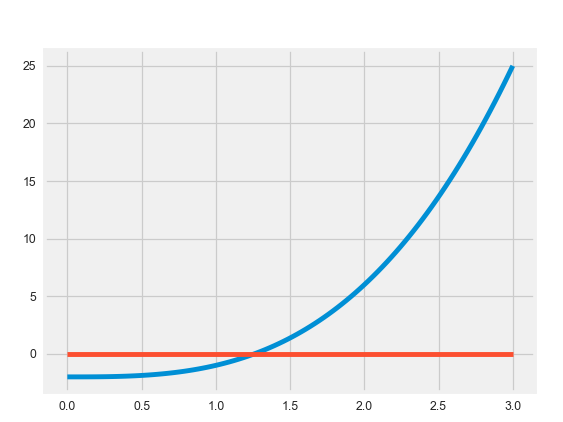

In [24]:
# rootfinding
plt.figure()
x = np.linspace(0,3,100)
plt.plot(x,x**3-2);
plt.plot(x, x-x);

In [25]:
f =lambda x: x**3-2

In [27]:
a, b = 0, 2

tol=10e-10

lower, upper = a, b

while upper - lower > tol:
    middle = 0.5 * (upper + lower)
    # === if root is between lower and middle === #
    if f(middle) > 0:  
        lower, upper = lower, middle
    # === if root is between middle and upper  === #
    else:              
        lower, upper = middle, upper
        
middle        

###  <span style="color:red">It is your turn to turn it into a function</span>

### Check with Scipy

In [29]:
from scipy.optimize import bisect
## example 
f =lambda x: x**3-2
#f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 2)

The `bisect()` method takes three compulsory arguments: 

- (i) the function `f(x)`, 

- (ii) a lower limit `a` (for which we have chosen 1.5 in our example) and 

- (ii) an upper limit `b` (for which we have chosen 3). The optional parameter xtol determines the maximum error of the method.

One of the requirements of the bisection method is that the interval `[a, b]` has to be chosen such that the function is either positive at`a` and negative at `b`, or that the function is negative at `a` and postive at `b`. In other words: `a` and `b` have to enclose a root.

### lambda operator or lambda function 

The lambda operator or lambda function is a way to create small anonymous functions, i.e. functions without a name. These functions are throw-away functions, i.e. they are just needed where they have been created. Lambda functions are mainly used in combination with the functions filter(), map() and reduce(). The lambda feature was added to Python due to the demand from Lisp programmers. 

https://www.python-course.eu/lambda.php

http://www.secnetix.de/olli/Python/lambda_functions.hawk

In [34]:
def f (x): return x**2

f(8)

In [35]:
g = lambda x: x**2

g(8)

In [30]:
def mybisect(f, a, b, tol=10e-10):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [31]:
mybisect(f, 0, 2)

### Function Iteration

In [ ]:
x = x0
for it in range(maxit):
    xold = x
    x = f(x) # update x
    diff = np.linalg.norm(x - xold)

    if diff < tol:

        return x

###  <span style="color:red">It is your turn to turn it into a function</span>

### Check with Scipy

In [33]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**0.5, 0.4)  # 0.4 is an initial guess

array(1.)

In [36]:
def myfixpoint(f, x0, maxit = 1000,tol=10e-10):
    # 
    x = x0
    for it in range(maxit):
        xold = x
        x = f(x) 
        diff = np.linalg.norm(x - xold)

        if diff < tol:
            
            return x


In [39]:
myfixpoint(lambda x: x**0.5, x0=0.4)

In [32]:
from IPython.core.display import HTML, Image
css_file = '../../custom.css'
HTML(open(css_file, 'r').read())